In [95]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [96]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

In [97]:
data = load_iris()
data.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [98]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)

In [99]:
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
print(nca_pipe.score(X_test, y_test))

0.9619047619047619


[2]


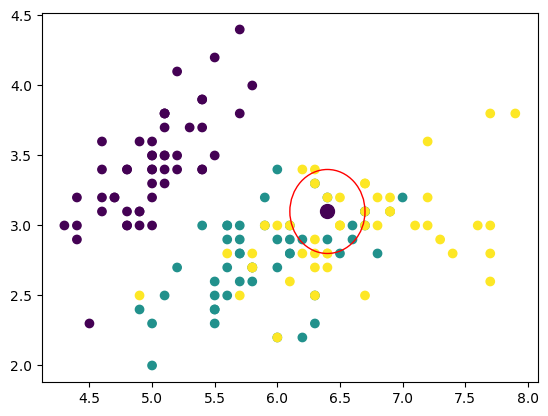

In [101]:
#2d plot
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)

#test with new point
#	SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm	Species
#138	6.4	3.1	5.5	1.8	Iris-virginica

test_data = [[6.4, 3.1, 5.5, 1.8]]
predicted = nca_pipe.predict(test_data)
print(predicted)

plt.scatter(test_data[0][0], test_data[0][1], c=predicted, s=100)
circle = plt.Circle((test_data[0][0], test_data[0][1]), 0.3, color='r', fill=False)
plt.gca().add_patch(circle)

plt.show()

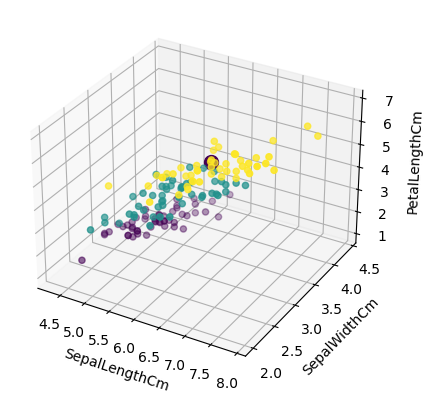

In [102]:
#3d plot
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

ax.scatter(test_data[0][0], test_data[0][1], test_data[0][2], c=predicted, s=100)

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('PetalLengthCm');

plt.show()
